# Small Images Classification using Artificial Neural Network (ANN)

I have used ANN for a simple classification task for CIFAR-10 dataset. This dataset contains various low-resolution images. The dataset is imported from keras datasets.

### Dataset Information
The CIFAR-10 dataset consists of 60000 colour images (32x32) in 10 classes Each class contains 6000 images. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.

### Import necessary libraries

In [405]:
import numpy as np               # library for numerical arrays (vectors, matrices, tensors)
import matplotlib.pyplot as plt  # library providing tools for plotting data 
import tensorflow                # tensorflow library providing methods for defining and training ANN 

### Loading the data

In [406]:
# load dataset
from tensorflow.keras.datasets import cifar10
(trainval_images, trainval_labels), (test_images, test_labels_numeric) = cifar10.load_data()

# shape of train and test image
print(f'Number of training and validation examples{trainval_images.shape}')
print(f'Number of test examples{test_images.shape}')

Number of training and validation examples(50000, 32, 32, 3)
Number of test examples(10000, 32, 32, 3)


In [407]:
# the label values are stored as integer numbers, in the range [0, 9]
# these numeric labels correspond to the classes of clothing items the image represent:

labels = np.unique(test_labels_numeric)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


### Finding the classes

In [408]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog',   'frog',   'horse',  'ship',   'truck']

# display numeric label and corresponding class name 
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 airplane
1 		 automobile
2 		 bird
3 		 cat
4 		 deer
5 		 dog
6 		 frog
7 		 horse
8 		 ship
9 		 truck


### Visualizing 20 images from the training dataset

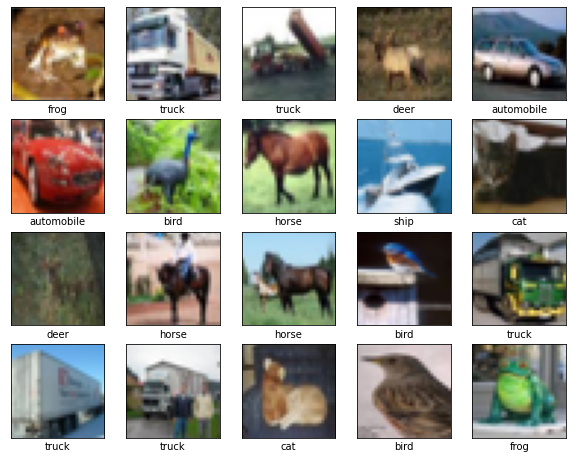

In [409]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(trainval_images[:20],trainval_labels[:20]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(image, cmap='binary') # set the colormap to 'binary' 
    plt.xlabel(class_names[int(label)])
    i += 1
plt.show()

### Visualizing an image with grayscale value of each pixel

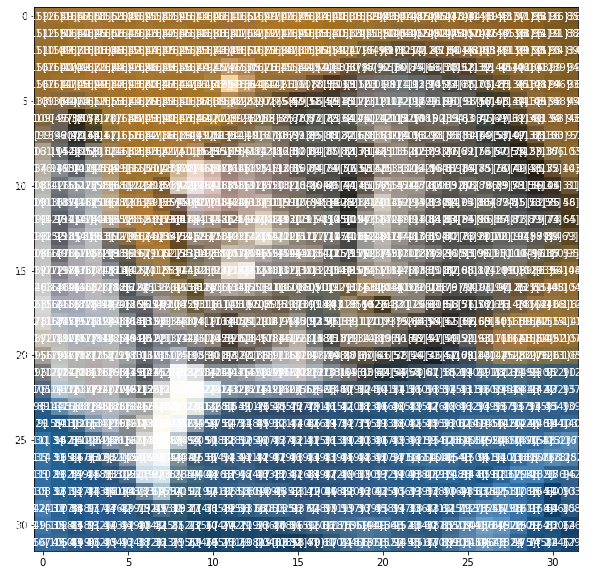

In [410]:
# select the image to visualize
img = test_images[0]
# create figure and axis objects
fig, ax = plt.subplots(1,1,figsize = (10,10)) 
# display image
ax.imshow(img, cmap='gray')
width, height, depth = img.shape
# this value will be needed in order to change the color of annotations
thresh = img.max()/2.5

# display grayscale value of each pixel
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # if a pixel is black set the color of annotation as white
                    color='white' if img[x][y].any()<thresh else 'black')

In [411]:
trainval_labels = tensorflow.keras.utils.to_categorical(trainval_labels)   # convert the data type for label values in training set
test_labels     = tensorflow.keras.utils.to_categorical(test_labels_numeric)   # convert the data type for label values in test set 

print("label in numeric form of first data point in test set: ",test_labels_numeric[0])
print("label in one-hot form of first data point in test set: ",test_labels[0])

label in numeric form of first data point in test set:  [3]
label in one-hot form of first data point in test set:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [412]:
trainval_labels.shape

(50000, 10)

In [413]:
trainval_images.shape

(50000, 32, 32, 3)

### The Model

In [414]:
# define model architecture

model = tensorflow.keras.Sequential()       # create an object "model" that represents an ANN

# define an input layer with 3072(=32*32*3) nodes (features) and add a hidden layer with 512 neurons
# the input layer is densely connected with the hidden layer, i.e., there is are links between 
# every pair of input node and neuron in the first hidden layer 

model.add(tensorflow.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  

# add ouput layer consisting of 10 neurons using softmax activation function 
# the preceeding layer is densely connected to the ouput layer

model.add(tensorflow.keras.layers.Dense(10, activation='softmax')) 

In [415]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


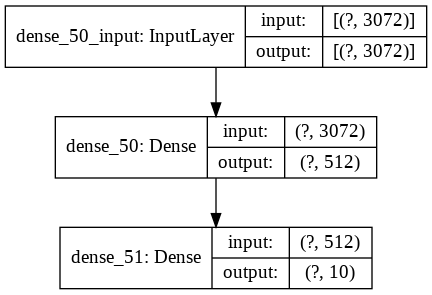

In [416]:
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=True, show_layer_names=True)

### Model Compilation

In [417]:
# compile the model
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [418]:
# reshape the training and test images
trainval_images = trainval_images.reshape((50000, 32*32*3))
test_images = test_images.reshape((10000, 32*32*3))

# Normalize data to have feature values between 0 and 1
trainval_images = trainval_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [419]:
%%time 
# track execution time

History = model.fit(trainval_images, trainval_labels, validation_split=0.2, batch_size=64, epochs=40)

Epoch 1/40
625/625 [==============================] - 2s 3ms/step - loss: 2.1796 - accuracy: 0.2698 - val_loss: 1.8386 - val_accuracy: 0.3363
Epoch 2/40
625/625 [==============================] - 2s 3ms/step - loss: 1.7810 - accuracy: 0.3599 - val_loss: 1.7247 - val_accuracy: 0.3892
Epoch 3/40
625/625 [==============================] - 2s 3ms/step - loss: 1.6925 - accuracy: 0.3956 - val_loss: 1.6890 - val_accuracy: 0.3946
Epoch 4/40
625/625 [==============================] - 2s 3ms/step - loss: 1.6462 - accuracy: 0.4129 - val_loss: 1.6553 - val_accuracy: 0.4185
Epoch 5/40
625/625 [==============================] - 2s 3ms/step - loss: 1.6096 - accuracy: 0.4279 - val_loss: 1.6045 - val_accuracy: 0.4358
Epoch 6/40
625/625 [==============================] - 2s 3ms/step - loss: 1.5823 - accuracy: 0.4397 - val_loss: 1.6143 - val_accuracy: 0.4298
Epoch 7/40
625/625 [==============================] - 2s 3ms/step - loss: 1.5584 - accuracy: 0.4462 - val_loss: 1.6344 - val_accuracy: 0.4252
Epoch 

In [420]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current tensorflow version
if int(tensorflow.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

### Plotting the training and validation accuracy

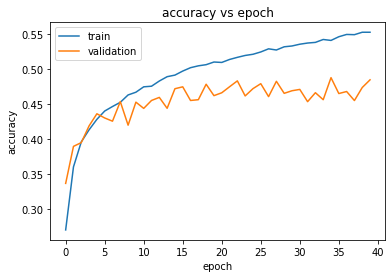

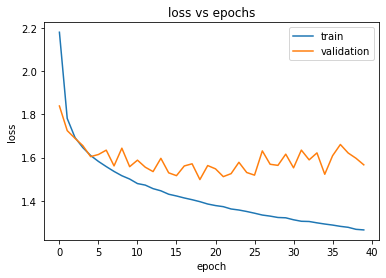

In [421]:
###-----plot accuracy-----------
# plot training accuracy
plt.plot(History.history[acc_key])
# plot validation accuracy
plt.plot(History.history['val_' + acc_key])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(History.history['loss'])
# plot validation loss
plt.plot(History.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

### Finding the test accuracy

In [422]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

313/313 - 1s - loss: 1.5461 - accuracy: 0.4823
Accuracy on test dataset: 0.4823000133037567


### Result and Conclusion

We notice the training accuracy is 55% whereas the validation accuracy is around 48%. Though the accuracy is not so good but still we don't have much overfitting. Loss is noted to be small for both the training and validation data. But still we observe some kinks in both the plots. Few measures can be taken to obtain better accuracy and get smooth curves i.e. changing the batch size, changing the neuron count, using various loss functions, adding different regularization and dropout etc.